**BINARY CLASSIFICATION WITH PYTORCH**

*DATASETS : sklearn.datasets.make_circles*

1. Import necessary librarys

In [1]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import torch
from torch import nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

2. Creating data

In [2]:
N_SAMPLES = 1000

In [3]:
x,y = make_circles(n_samples=N_SAMPLES,noise=0.04)

x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

(torch.Size([750, 2]),
 torch.Size([750]),
 torch.Size([250, 2]),
 torch.Size([250]))

3. Visualize data

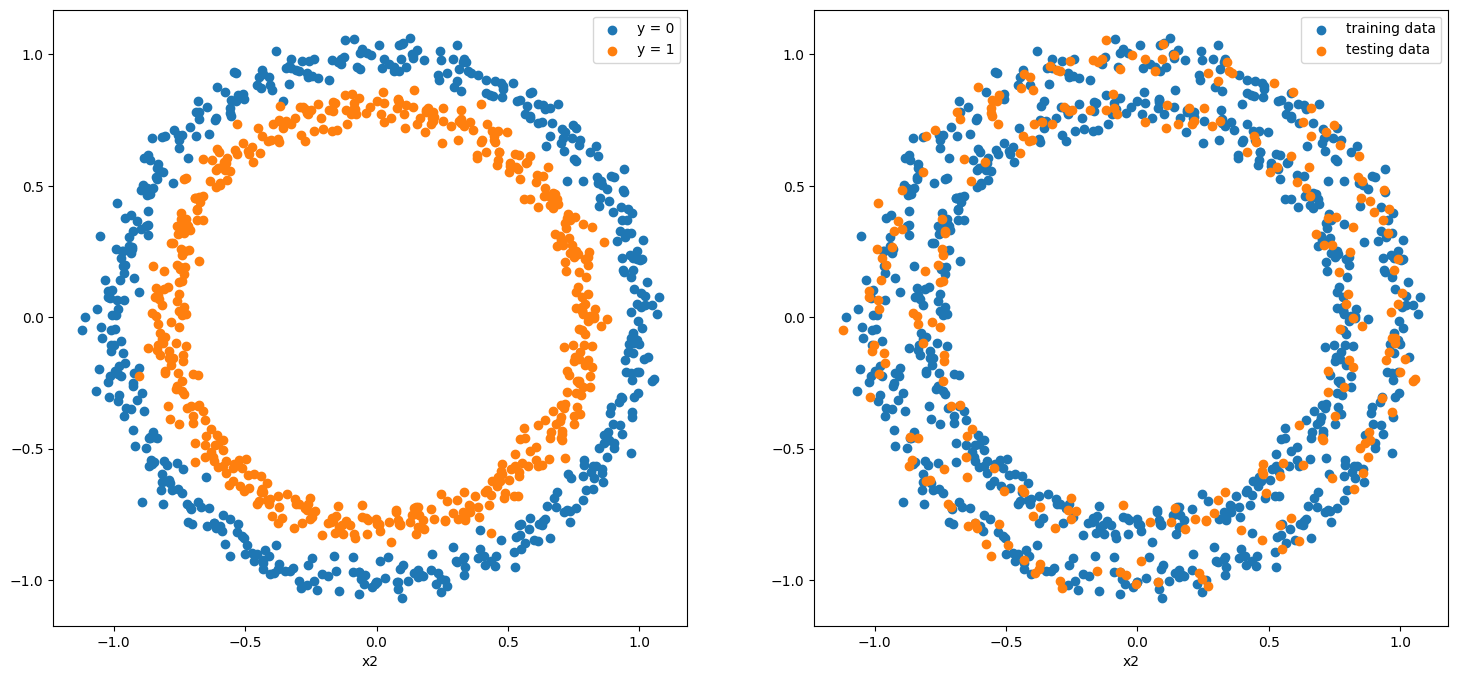

In [4]:
plt.figure(figsize=(18,8))
plt.subplot(1, 2, 1)
plt.scatter(x[y==0][:,0],x[y==0][:,1],label="y = 0")
plt.scatter(x[y==1][:,0],x[y==1][:,1],label="y = 1")
plt.xlabel("x1")
plt.xlabel("x2")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(x_train[:,0],x_train[:,1],label="training data")
plt.scatter(x_test[:,0],x_test[:,1],label="testing data")
plt.xlabel("x1")
plt.xlabel("x2")
plt.legend()
plt.show()

4. Build model

In [5]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(in_features=2,out_features=8)
        self.linear2 = nn.Linear(in_features=8,out_features=8)
        self.linear3 = nn.Linear(in_features=8,out_features=1)
        self.relu = nn.ReLU()

    def forward(self,x:torch.Tensor) -> torch.Tensor :
        layer1 = self.linear1(x)
        layer2 = self.linear2(self.relu(layer1))
        layer3 = self.linear3(self.relu(layer2))
        return layer3

Initialization model

In [6]:
model = CircleModelV1()
print(model)
model.state_dict()

CircleModelV1(
  (linear1): Linear(in_features=2, out_features=8, bias=True)
  (linear2): Linear(in_features=8, out_features=8, bias=True)
  (linear3): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
)


OrderedDict([('linear1.weight',
              tensor([[-0.4237,  0.5560],
                      [-0.2520,  0.6187],
                      [ 0.5879,  0.1193],
                      [-0.0467, -0.0991],
                      [ 0.5953,  0.1812],
                      [-0.3078,  0.0230],
                      [ 0.5977, -0.0353],
                      [-0.0206, -0.6715]])),
             ('linear1.bias',
              tensor([-0.5295, -0.1834, -0.2179,  0.4288,  0.2080, -0.2692, -0.2470,  0.3283])),
             ('linear2.weight',
              tensor([[ 0.2037, -0.0099,  0.2407, -0.0648,  0.0965, -0.1079, -0.2460,  0.1626],
                      [-0.2916,  0.0595,  0.2492,  0.2028, -0.0606,  0.0831, -0.3261, -0.2755],
                      [-0.1552, -0.1365,  0.2440,  0.2409,  0.0787,  0.1565,  0.0321,  0.0151],
                      [-0.2496,  0.2352, -0.1200,  0.1681,  0.0749,  0.0895, -0.2024, -0.1811],
                      [ 0.1152, -0.1392, -0.1394, -0.3195, -0.1265, -0.3361,  0.1339, 

5. Creating accuracy func

In [7]:
def accuracy_fn(y_pred,y_true):
    correct = torch.eq(y_pred,y_true).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [8]:
model.eval()
with torch.inference_mode():
    y_pred_test = model(x_test).squeeze()
    y_pred_label = torch.round(torch.sigmoid(y_pred_test))
    print(f"Accuracy when not learning: {accuracy_fn(y_pred_label,y_test)}%")

Accuracy when not learning: 55.60000000000001%


6. Creating loss and optimizer func

In [9]:
lossBCE = nn.BCEWithLogitsLoss()
opt = torch.optim.SGD(params=model.parameters(),lr=0.08)

7. Training model

In [10]:
%%time

EPOCHS = 3000
epoch_list = []
loss_train_list = []
loss_test_list = []
acc_train_list = []
acc_test_list = []

for epoch in range(EPOCHS):
    # training
    model.train()

    y_pred_train = model(x_train).squeeze()
    loss_train = lossBCE(y_pred_train,y_train)

    y_pred_label_train = torch.round(torch.sigmoid(y_pred_train))
    acc_train = accuracy_fn(y_pred_label_train,y_train)

    opt.zero_grad()
    loss_train.backward()
    opt.step()

    # evaluting
    model.eval()
    with torch.inference_mode():
        y_pred_test = model(x_test).squeeze()
        loss_test = lossBCE(y_pred_test,y_test)

        y_pred_label_test = torch.round(torch.sigmoid(y_pred_test))
        acc_test = accuracy_fn(y_pred_label_test,y_test)

        if epoch % 150 == 0:
            print(f"Epoch {epoch}#")
            print(f"Loss train : {loss_train}, Accuracy train : {acc_train}%")
            print(f"Loss test : {loss_test}, Accuracy test : {acc_test}%")

            epoch_list.append(epoch)
            loss_train_list.append(loss_train.detach().numpy())
            loss_test_list.append(loss_test.detach().numpy())
            acc_train_list.append(acc_train)
            acc_test_list.append(acc_test)

Epoch 0#
Loss train : 0.6920887231826782, Accuracy train : 60.66666666666667%
Loss test : 0.6938140988349915, Accuracy test : 55.60000000000001%
Epoch 150#
Loss train : 0.6907101273536682, Accuracy train : 51.6%
Loss test : 0.6946727633476257, Accuracy test : 45.2%
Epoch 300#
Loss train : 0.689103364944458, Accuracy train : 56.666666666666664%
Loss test : 0.6935127973556519, Accuracy test : 50.4%
Epoch 450#
Loss train : 0.6866413354873657, Accuracy train : 60.0%
Loss test : 0.6910669803619385, Accuracy test : 54.800000000000004%
Epoch 600#
Loss train : 0.6823375225067139, Accuracy train : 61.46666666666667%
Loss test : 0.6864171028137207, Accuracy test : 55.2%
Epoch 750#
Loss train : 0.6740390658378601, Accuracy train : 67.86666666666666%
Loss test : 0.677052915096283, Accuracy test : 63.6%
Epoch 900#
Loss train : 0.6567650437355042, Accuracy train : 80.80000000000001%
Loss test : 0.6584143042564392, Accuracy test : 80.4%
Epoch 1050#
Loss train : 0.6215195059776306, Accuracy train : 86

8. Visualize loss and accuracy

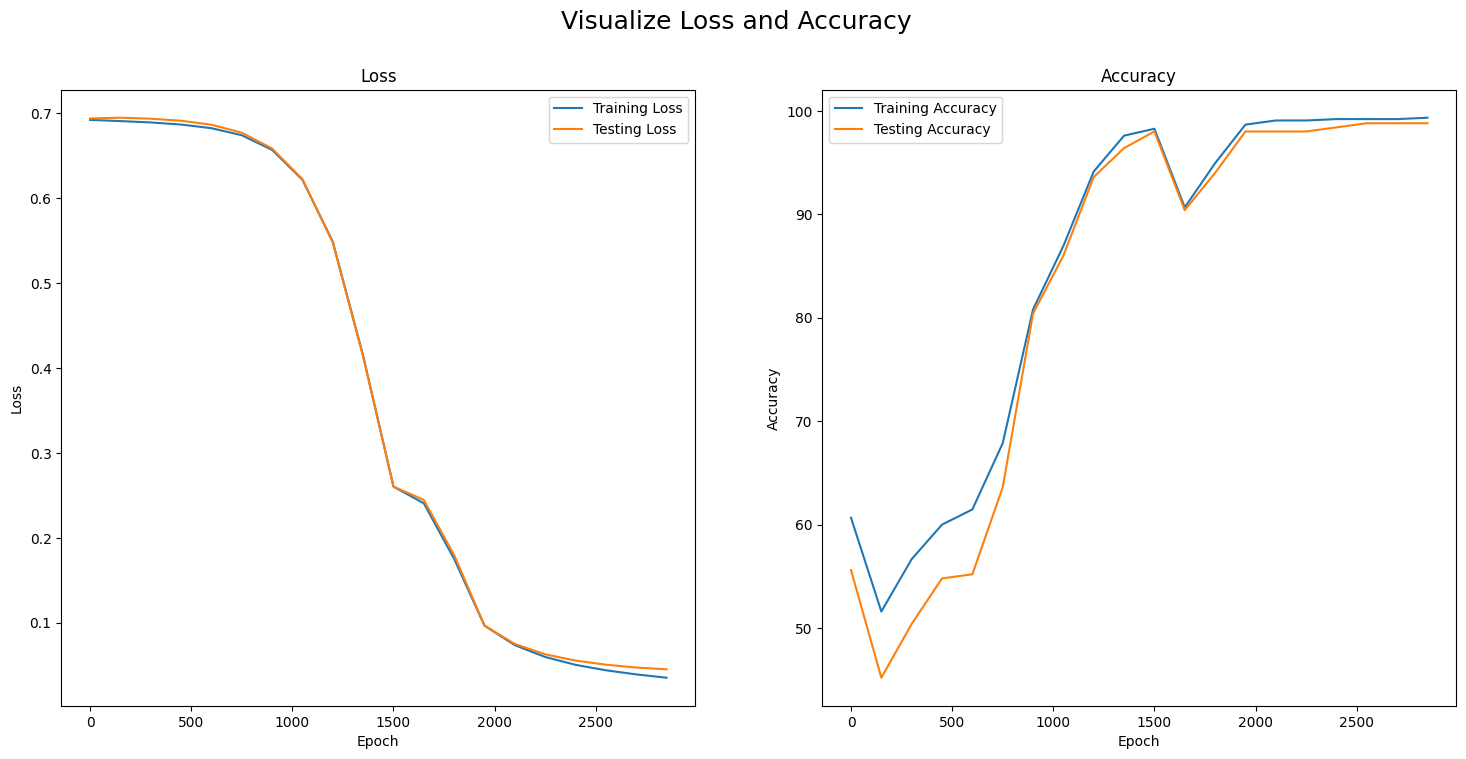

In [11]:
plt.figure(figsize=(18,8))
plt.suptitle("Visualize Loss and Accuracy", fontsize=18)

plt.subplot(1,2,1)
plt.plot(epoch_list,loss_train_list,label="Training Loss")
plt.plot(epoch_list,loss_test_list,label="Testing Loss")
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(epoch_list,acc_train_list,label="Training Accuracy")
plt.plot(epoch_list,acc_test_list,label="Testing Accuracy")
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

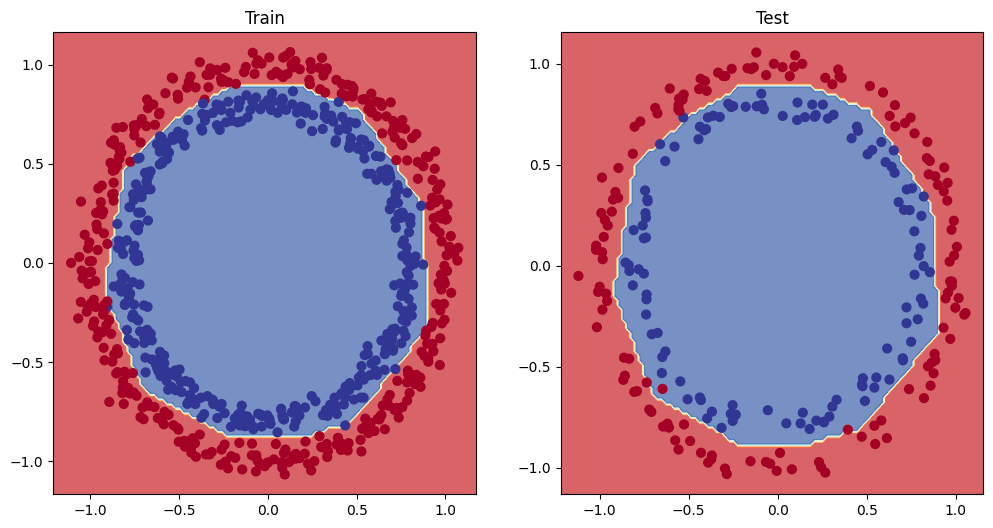

In [12]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, x_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, x_test, y_test)

8. Save model

In [14]:
from pathlib import Path 

MODEL = Path("model")
MODEL.mkdir(parents=True,exist_ok=True)
MODEL_NAME= "binary_classification_model.pth"
MODEL_PATH = MODEL / MODEL_NAME

torch.save(obj=model.state_dict(),f=MODEL_PATH)